Purpose: To find the number of genes in each module resulting from WGCNA.<br>
Author: Anna Pardo<br>
Date initiated: July 25, 2023

In [1]:
# load modules
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set directory name
directory = "../../data/WGCNA_output/outputs_from_hpcc/"

In [11]:
# load lists of genes into a dictionary
modgenes = {}
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        modname = filename.split("_")[0]
        df = pd.read_csv(directory+filename,sep="\t",header="infer")
        genelist = list(df["x"])
        modgenes[modname] = genelist

In [13]:
# make a dataframe of the counts of genes
modnames = []
gcounts = []
for m in modgenes.keys():
    modnames.append(m)
    gcounts.append(len(modgenes[m]))
gcdf = pd.DataFrame(list(zip(modnames,gcounts)),columns=["Module","Number of Genes"])

In [79]:
gcdf = gcdf.sort_values(by=["Number of Genes"],ascending=False)

In [17]:
len(gcdf.index)

21

In [19]:
sum(gcdf["Number of Genes"])/21

1856.904761904762

Next task: plot module eigengenes for each stressor (either vs. all controls, or vs. its own control).

In [3]:
# load eigengenes
me = pd.read_csv(directory+"module_eigengenes.csv",sep=",",header="infer").rename(columns={"Unnamed: 0":"Sample"})
me.head()

,Sample,MElightcyan,MEmidnightblue,MElightyellow,MEred,MEyellow,MEcyan,MEgreen,MEgrey60,MEdarkgreen,...,MEroyalblue,MEblack,MEturquoise,MEgreenyellow,MEbrown,MEtan,MElightgreen,MEmagenta,MEsalmon,MEgrey
0,SRR11933261,-0.009677,0.006612,0.006440,0.013561,-0.008236,-0.000545,-0.001525,-0.000752,0.001077,...,-0.002384,0.001257,0.000734,0.011421,0.025569,0.009950,0.002021,0.003789,-0.002529,0.002320
1,SRR11933272,-0.002880,-0.010907,0.003396,0.032058,0.007353,-0.002888,-0.003315,-0.004980,-0.001483,...,-0.004365,-0.005648,-0.006392,-0.003955,0.004203,-0.005690,-0.005529,-0.007972,-0.005851,0.009844
2,SRR11933250,-0.003891,-0.000691,0.006347,0.021260,-0.003031,-0.001952,-0.002447,-0.002252,-0.001321,...,-0.002927,-0.000822,0.001611,-0.002546,0.012383,0.000962,-0.003745,-0.001986,-0.002453,0.007164
3,SRR11933029,-0.001683,0.004985,0.002706,0.021334,-0.001160,-0.002109,-0.003007,-0.003369,-0.001424,...,-0.004254,-0.006391,-0.005327,-0.004645,0.003996,0.000079,-0.003625,-0.001535,-0.002906,-0.007600
4,SRR11933040,-0.011016,-0.006360,0.000853,0.010987,-0.010764,-0.002511,-0.003377,-0.003419,-0.001900,...,-0.005390,-0.003846,-0.003235,-0.000588,0.005792,-0.004165,-0.004816,-0.006322,-0.004928,0.018503


In [24]:
len(me.index)

1981

In [4]:
# load metadata
md = pd.read_csv("../../data/srr_numbers_with_metadata_12-May-2023.csv",sep=",",header="infer")
md.head()

,BioProject,Sample,sample_name,Replicate_num,Genotype,Technology,Library_layout,Treatment,Duration_hours,Time_after_treatment,...,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media,Notes
0,PRJNA637522,SRR11933261,238_WS2,NaN,238,Illumina HiSeq 2500,PAIRED,Drought,312.0,13 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
1,PRJNA637522,SRR11933272,238_WS1,NaN,238,Illumina HiSeq 2500,PAIRED,Drought,216.0,9 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
2,PRJNA637522,SRR11933250,268_WS1,NaN,268,Illumina HiSeq 2500,PAIRED,Drought,216.0,9 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
3,PRJNA637522,SRR11933029,268_WW,NaN,268,Illumina HiSeq 2500,PAIRED,Control,216.0,9 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
4,PRJNA637522,SRR11933040,268_WS2,NaN,268,Illumina HiSeq 2500,PAIRED,Drought,312.0,13 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN


In [5]:
# add treatment and BioProject information to eigengene data
met = md[["Sample","Treatment","BioProject"]].merge(me)
met.head()

,Sample,Treatment,BioProject,MElightcyan,MEmidnightblue,MElightyellow,MEred,MEyellow,MEcyan,MEgreen,...,MEroyalblue,MEblack,MEturquoise,MEgreenyellow,MEbrown,MEtan,MElightgreen,MEmagenta,MEsalmon,MEgrey
0,SRR11933261,Drought,PRJNA637522,-0.009677,0.006612,0.006440,0.013561,-0.008236,-0.000545,-0.001525,...,-0.002384,0.001257,0.000734,0.011421,0.025569,0.009950,0.002021,0.003789,-0.002529,0.002320
1,SRR11933272,Drought,PRJNA637522,-0.002880,-0.010907,0.003396,0.032058,0.007353,-0.002888,-0.003315,...,-0.004365,-0.005648,-0.006392,-0.003955,0.004203,-0.005690,-0.005529,-0.007972,-0.005851,0.009844
2,SRR11933250,Drought,PRJNA637522,-0.003891,-0.000691,0.006347,0.021260,-0.003031,-0.001952,-0.002447,...,-0.002927,-0.000822,0.001611,-0.002546,0.012383,0.000962,-0.003745,-0.001986,-0.002453,0.007164
3,SRR11933029,Control,PRJNA637522,-0.001683,0.004985,0.002706,0.021334,-0.001160,-0.002109,-0.003007,...,-0.004254,-0.006391,-0.005327,-0.004645,0.003996,0.000079,-0.003625,-0.001535,-0.002906,-0.007600
4,SRR11933040,Drought,PRJNA637522,-0.011016,-0.006360,0.000853,0.010987,-0.010764,-0.002511,-0.003377,...,-0.005390,-0.003846,-0.003235,-0.000588,0.005792,-0.004165,-0.004816,-0.006322,-0.004928,0.018503


In [7]:
met["Treatment"].unique()

array(['Drought', 'Control', 'Heat', 'Cold', 'Salt', 'Low_Nitrogen',
       'Flooding'], dtype=object)

In [6]:
# replace DroughtRepeat with Drought
met["Treatment"].mask(met["Treatment"]=="DroughtRepeat","Drought",inplace=True)

In [8]:
# drop column with grey module (unassigned genes)
met = met.drop("MEgrey",axis=1)

In [10]:
# rename columns to remove the "ME"
for c in met.columns:
    if c not in ["Sample","Treatment","BioProject"]:
        met.rename(columns={c:c.lstrip("ME")},inplace=True)
met.head()

,Sample,Treatment,BioProject,lightcyan,midnightblue,lightyellow,red,yellow,cyan,green,...,pink,royalblue,black,turquoise,greenyellow,brown,tan,lightgreen,magenta,salmon
0,SRR11933261,Drought,PRJNA637522,-0.009677,0.006612,0.006440,0.013561,-0.008236,-0.000545,-0.001525,...,-0.001091,-0.002384,0.001257,0.000734,0.011421,0.025569,0.009950,0.002021,0.003789,-0.002529
1,SRR11933272,Drought,PRJNA637522,-0.002880,-0.010907,0.003396,0.032058,0.007353,-0.002888,-0.003315,...,-0.002154,-0.004365,-0.005648,-0.006392,-0.003955,0.004203,-0.005690,-0.005529,-0.007972,-0.005851
2,SRR11933250,Drought,PRJNA637522,-0.003891,-0.000691,0.006347,0.021260,-0.003031,-0.001952,-0.002447,...,-0.000139,-0.002927,-0.000822,0.001611,-0.002546,0.012383,0.000962,-0.003745,-0.001986,-0.002453
3,SRR11933029,Control,PRJNA637522,-0.001683,0.004985,0.002706,0.021334,-0.001160,-0.002109,-0.003007,...,-0.002064,-0.004254,-0.006391,-0.005327,-0.004645,0.003996,0.000079,-0.003625,-0.001535,-0.002906
4,SRR11933040,Drought,PRJNA637522,-0.011016,-0.006360,0.000853,0.010987,-0.010764,-0.002511,-0.003377,...,-0.001801,-0.005390,-0.003846,-0.003235,-0.000588,0.005792,-0.004165,-0.004816,-0.006322,-0.004928


In [11]:
# save met
met.to_csv("../../data/WGCNA_output/reformatted_eigengenes.tsv",sep="\t",header=True,index=False)

In [31]:
# initial plot: mean module eigengene for each treatment, including control as its own treatment
## drop Sample
metd = met.drop("Sample",axis=1)
metd.head()

,Treatment,MElightcyan,MEmidnightblue,MElightyellow,MEred,MEyellow,MEcyan,MEgreen,MEgrey60,MEdarkgreen,...,MEroyalblue,MEblack,MEturquoise,MEgreenyellow,MEbrown,MEtan,MElightgreen,MEmagenta,MEsalmon,MEgrey
0,Drought,-0.009677,0.006612,0.006440,0.013561,-0.008236,-0.000545,-0.001525,-0.000752,0.001077,...,-0.002384,0.001257,0.000734,0.011421,0.025569,0.009950,0.002021,0.003789,-0.002529,0.002320
1,Drought,-0.002880,-0.010907,0.003396,0.032058,0.007353,-0.002888,-0.003315,-0.004980,-0.001483,...,-0.004365,-0.005648,-0.006392,-0.003955,0.004203,-0.005690,-0.005529,-0.007972,-0.005851,0.009844
2,Drought,-0.003891,-0.000691,0.006347,0.021260,-0.003031,-0.001952,-0.002447,-0.002252,-0.001321,...,-0.002927,-0.000822,0.001611,-0.002546,0.012383,0.000962,-0.003745,-0.001986,-0.002453,0.007164
3,Control,-0.001683,0.004985,0.002706,0.021334,-0.001160,-0.002109,-0.003007,-0.003369,-0.001424,...,-0.004254,-0.006391,-0.005327,-0.004645,0.003996,0.000079,-0.003625,-0.001535,-0.002906,-0.007600
4,Drought,-0.011016,-0.006360,0.000853,0.010987,-0.010764,-0.002511,-0.003377,-0.003419,-0.001900,...,-0.005390,-0.003846,-0.003235,-0.000588,0.005792,-0.004165,-0.004816,-0.006322,-0.004928,0.018503


In [32]:
# get means
means = metd.groupby("Treatment").mean()
means.head()

,MElightcyan,MEmidnightblue,MElightyellow,MEred,MEyellow,MEcyan,MEgreen,MEgrey60,MEdarkgreen,MEdarkred,...,MEroyalblue,MEblack,MEturquoise,MEgreenyellow,MEbrown,MEtan,MElightgreen,MEmagenta,MEsalmon,MEgrey
Treatment,,,,,,,,,,,,,,,,,,,,,
Cold,-0.008054,-0.007395,-0.002558,-0.013209,0.009951,-0.002735,-0.002025,-0.003303,-0.001897,-0.003148,...,-0.002052,0.004358,0.019093,0.006791,-0.001729,-0.004964,-0.002394,-0.002732,-0.002517,-0.008631
Control,0.003570,-0.001658,-0.001734,-0.001384,0.001420,0.000175,0.000278,-0.002908,-0.000582,-0.001460,...,0.000468,-0.000013,-0.000129,-0.001628,-0.005050,-0.002459,-0.001932,-0.001237,-0.000038,-0.005628
Drought,-0.005729,-0.001560,0.002318,0.009292,-0.005811,0.001626,-0.001816,-0.000998,0.001609,0.002451,...,-0.002895,0.000170,-0.003041,0.000807,0.009553,0.000636,-0.003241,-0.002519,-0.003460,0.013494
Flooding,-0.007348,0.001116,0.004194,-0.000927,-0.006447,-0.002206,-0.002340,-0.002788,0.000429,0.003070,...,0.013171,0.004714,0.005898,0.000205,0.003218,0.017336,0.079619,0.016415,0.026807,-0.011435
Heat,-0.004549,-0.005716,-0.002413,-0.003266,0.006681,-0.000939,0.009302,0.020597,-0.000997,-0.003487,...,0.001888,-0.005018,-0.010387,-0.002977,-0.004850,-0.004466,-0.003096,0.003038,-0.001603,-0.010169


In [35]:
# make an individual plot for each module
## strip the "ME" from each column name
for c in means.columns:
    means.rename(columns={c:c.lstrip("ME")},inplace=True)

In [37]:
means = means.reset_index().rename(columns={"index":"Treatment"})

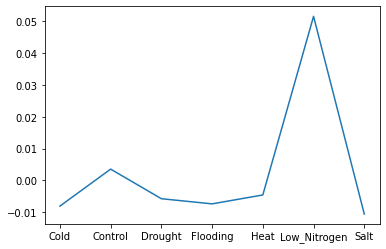

In [39]:
# try making a single bar plot to start with
# lightcyan
plt.plot(means["Treatment"],means["lightcyan"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6869899b80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f68698a7100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f68698998e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f68698a7640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f68698a78e0>],
 'means': []}

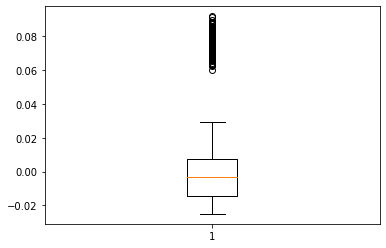

In [41]:
plt.boxplot(metd["MElightcyan"])

In [53]:
str(int(gcdf.loc[gcdf["Module"]=="lightcyan","Number of Genes"]))

'367'

Text(0.5, 0, 'Module eigengene')

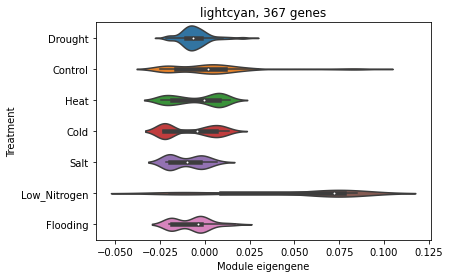

In [57]:
sns.violinplot(data=metd,y="Treatment",x="MElightcyan")
plt.title("lightcyan, "+str(int(gcdf.loc[gcdf["Module"]=="lightcyan","Number of Genes"]))+" genes")
plt.xlabel("Module eigengene")

In [90]:
# write a function to make a single violin plot
def violplot(colname,axrow,axcol):
    module = colname.lstrip("ME")
    x = sns.violinplot(ax=ax[axrow,axcol],data=metd,y="Treatment",x=colname)
    x.set_title(module+", "+str(int(gcdf.loc[gcdf["Module"]==module,"Number of Genes"]))+" genes")
    if axrow==6:
        x.set_xlabel("Module eigengene")
    else:
        x.set_xlabel("")
    x.set_ylabel("")

<AxesSubplot: xlabel='Treatment', ylabel='MElightcyan'>

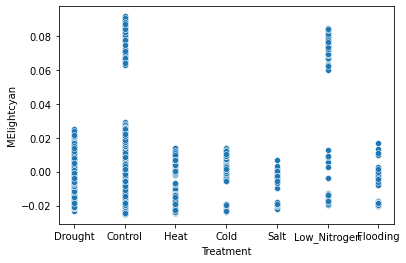

In [46]:
sns.scatterplot(data=metd,x="Treatment",y="MElightcyan")

In [87]:
l = [1,2,3]


In [86]:
while len(l)>0:
    l.remove(l[0])
    print(l)

[2, 3]
[3]
[]


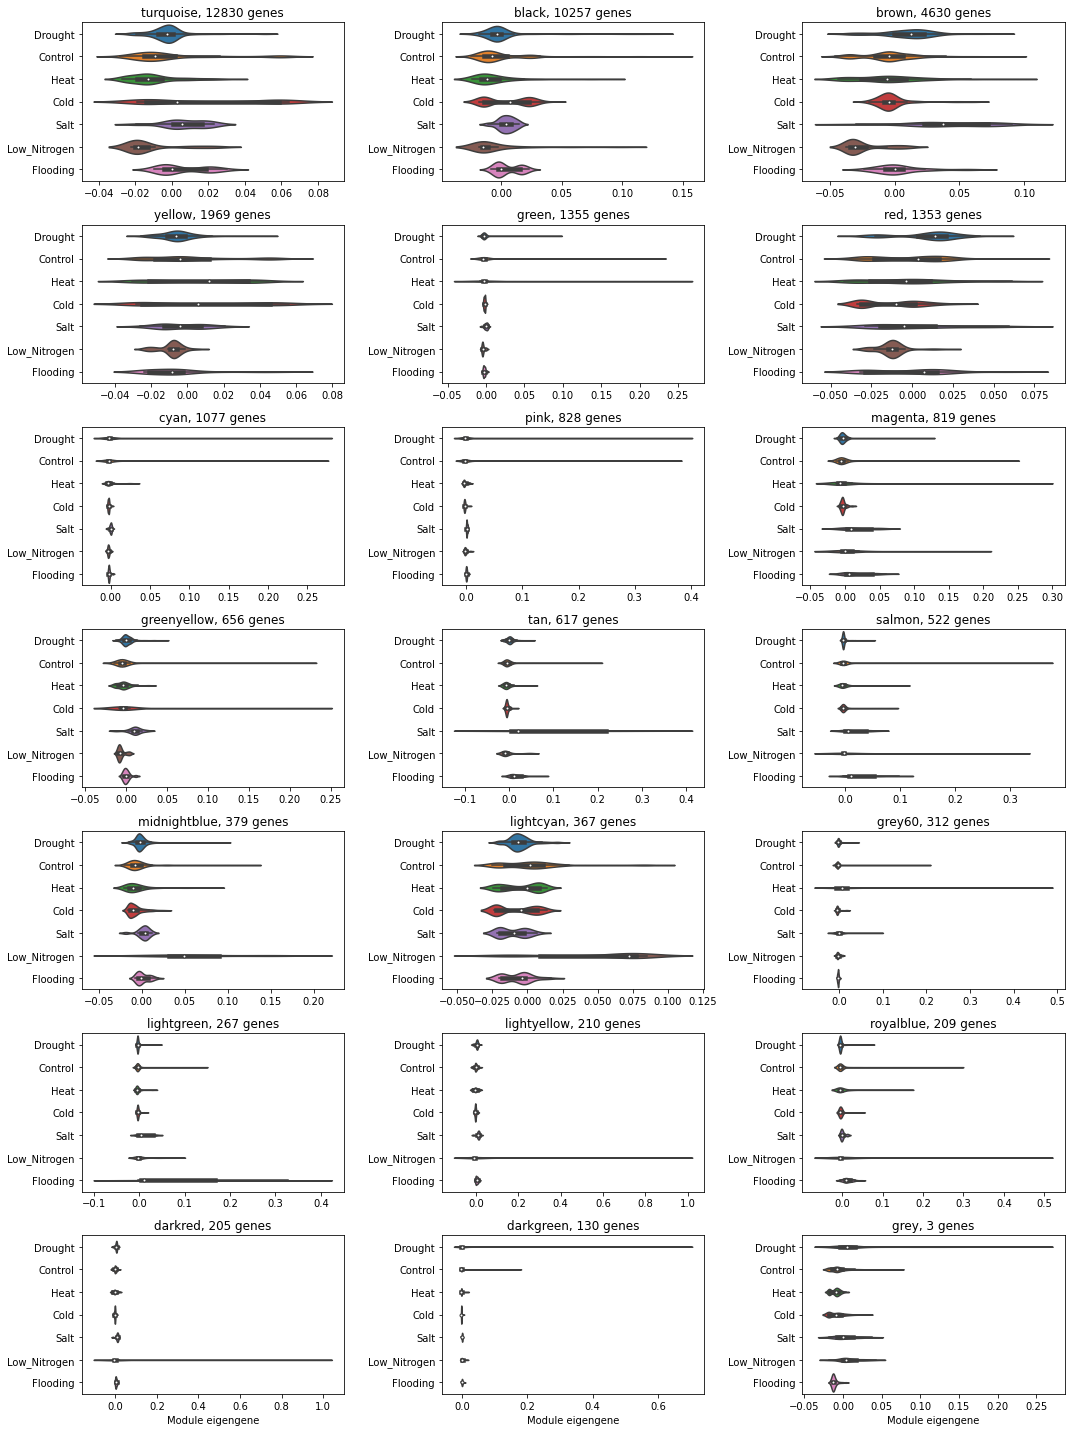

In [92]:
# let's go with violin plots
fig,ax = plt.subplots(nrows=7,ncols=3,figsize=(15,20))
# iterative plotting
modlist = list(gcdf["Module"])
while len(modlist)>0:
    for i in range(7):
        for j in range(3):
            col = "ME"+modlist[0]
            violplot(col,i,j)
            modlist.remove(modlist[0])
plt.tight_layout()
plt.savefig("../../figures/module_eigengene_violin_plots.pdf")